In [3]:
import numpy as np
import pandas as pd
import shutil
import cv2
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import os
import seaborn as sns
sns.set_style('darkgrid')
from PIL import Image
from sklearn.metrics import confusion_matrix, classification_report
from IPython.core.display import display, HTML

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Creation of Meta Data

In [5]:
train_path = "/content/drive/My Drive/kneeKL299/train/"
val_path = "/content/drive/My Drive/kneeKL299/val/"
test_path = "/content/drive/My Drive/kneeKL299/test/"

In [6]:
def createMetaData(path):
    grades = ['0/','1/','2/','3/','4/']
    finalData = []
    finalLabels = []
    for i in range(len(grades)):
        dir_join = path+grades[i]
        for file in os.listdir(dir_join):
            finalData.append(dir_join+file)
          #for three classes
          #if (i==0):
          #  finalLabels.append(0)
          #elif (i==1 or i==2):
          #  finalLabels.append(1)
          #else:
            finalLabels.append(i)
    dat = {'path':finalData,'label':finalLabels}
    return pd.DataFrame.from_dict(dat)

In [7]:
train_data = createMetaData(train_path)
train_data.head()

,path,label
0,/content/drive/My Drive/kneeKL299/train/0/9724...,0
1,/content/drive/My Drive/kneeKL299/train/0/9685...,0
2,/content/drive/My Drive/kneeKL299/train/0/9321...,0
3,/content/drive/My Drive/kneeKL299/train/0/9621...,0
4,/content/drive/My Drive/kneeKL299/train/0/9307...,0


In [8]:
val_data = createMetaData(val_path)
val_data.head()

,path,label
0,/content/drive/My Drive/kneeKL299/val/0/919907...,0
1,/content/drive/My Drive/kneeKL299/val/0/990790...,0
2,/content/drive/My Drive/kneeKL299/val/0/999929...,0
3,/content/drive/My Drive/kneeKL299/val/0/931606...,0
4,/content/drive/My Drive/kneeKL299/val/0/930527...,0


In [9]:
test_data = createMetaData(test_path)
test_data.head()

,path,label
0,/content/drive/My Drive/kneeKL299/test/0/97892...,0
1,/content/drive/My Drive/kneeKL299/test/0/95657...,0
2,/content/drive/My Drive/kneeKL299/test/0/96341...,0
3,/content/drive/My Drive/kneeKL299/test/0/97193...,0
4,/content/drive/My Drive/kneeKL299/test/0/98792...,0


## Data Analytics

In [ ]:
type(train_data)

pandas.core.frame.DataFrame

In [ ]:
train_data.count()

path     5798
label    5798
dtype: int64

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5798 entries, 0 to 5797
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    5798 non-null   object
 1   label   5798 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.7+ KB


In [ ]:
train_data.shape

(5798, 2)

In [ ]:
type(val_data)

pandas.core.frame.DataFrame

In [ ]:
val_data.count()

path     832
label    832
dtype: int64

In [ ]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 832 entries, 0 to 831
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    832 non-null    object
 1   label   832 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 13.1+ KB


In [ ]:
val_data.shape

(832, 2)

In [ ]:
type(test_data)

pandas.core.frame.DataFrame

In [ ]:
test_data.count()

path     1666
label    1666
dtype: int64

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    1666 non-null   object
 1   label   1666 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 26.2+ KB


In [ ]:
test_data.shape

(1666, 2)

In [ ]:
df = pd.DataFrame()
df['ostheoarthritis grading'] = ['Grade 0','Grade 1','Grade 2','Grade 3','Grade 4']
grade_count = []
for i in range(5):
    gc = len(train_data[train_data['label']==i]) + len(test_data[test_data['label']==i]) + len(val_data[val_data['label']==i])
    grade_count.append(gc)
df['count (training, validation and testing)'] = grade_count[:]
df

,ostheoarthritis grading,"count (training, validation and testing)"
0,Grade 0,3283
1,Grade 1,1495
2,Grade 2,2175
3,Grade 3,1092
4,Grade 4,251


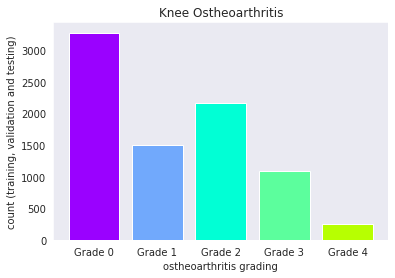

In [ ]:
x = list(np.arange(5))
y = list(df['count (training, validation and testing)'])
plt.bar(x,y,color=['#9a01ff','#71a9fc','#01ffd5','#5cfe9d','#b7ff01'])
plt.grid()
plt.xticks(x,list(df['ostheoarthritis grading']))
plt.xlabel('ostheoarthritis grading')
plt.ylabel('count (training, validation and testing)')
plt.title('Knee Ostheoarthritis')
plt.show()

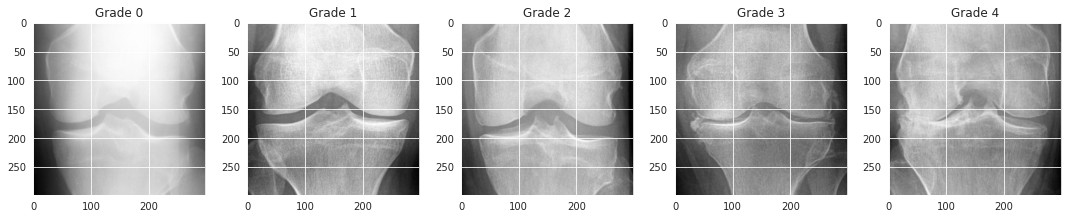

In [ ]:
fig, ax = plt.subplots(1,5,figsize=(15,15))
ax = ax.ravel()
plt.tight_layout()
ax = ax.ravel()
plt.tight_layout()
ldata = ['/content/drive/My Drive/kneeKL299/train/0/9005656L.png',
         '/content/drive/My Drive/kneeKL299/train/1/9008561R.png',
        '/content/drive/My Drive/kneeKL299/train/2/9024940L.png',
        '/content/drive/My Drive/kneeKL299/train/3/9037823L.png',
        '/content/drive/My Drive/kneeKL299/train/4/9204055R.png']
lab = ['Grade 0','Grade 1','Grade 2','Grade 3','Grade 4']
for i in range(0,5):
    ax[i].imshow(plt.imread(ldata[i]), cmap='gray')
    ax[i].set_title(lab[i])
plt.show()

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms


In [ ]:
def allDevice():
    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    return device

In [ ]:
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    #transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
  ])

In [ ]:
class KneeDataset(Dataset):
    def __init__(self,data,transforms=None):
        self.data = data
        self.transforms = transforms
    def __len__(self):
        return len(self.data)
    def __getitem__(self,idx):
        img_name = str(self.data.iloc[idx,0])
        image = cv2.imread(img_name)
        image = Image.fromarray(image)
        #image = image.resize((256, 256,3))
        label = torch.tensor(int(self.data.iloc[idx,1]))
        if self.transforms:
            image = self.transforms(image)
        return (image,label)

In [ ]:
import torchvision
device = allDevice()
model = torchvision.models.mobilenet_v2(pretrained=True)
print(model)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth


  0%|          | 0.00/13.6M [00:00<?, ?B/s]

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
train_set = KneeDataset(data=train_data, transforms=transform)
val_set = KneeDataset(data=val_data, transforms=transform)
test_set = KneeDataset(data=test_data, transforms=transform)

In [ ]:
batch_size= 32
train_dl = DataLoader(train_set,batch_size=batch_size,shuffle=True)
val_dl = DataLoader(val_set,batch_size=batch_size,shuffle=True)
test_dl = DataLoader(test_set,batch_size=batch_size)

In [ ]:
model.classifier= nn.Sequential(nn.Dropout(p=0.2, inplace=False),
                                nn.Linear(in_features=1280, out_features=5, bias=True))

In [ ]:
model.to(device)

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

In [ ]:
import torch.optim as optim
from torch.optim import lr_scheduler
optimizer= optim.Adam(model.parameters(),lr = 0.001)
scheduler = lr_scheduler.StepLR(optimizer,step_size =7,gamma=0.1)
loss_fn = nn.CrossEntropyLoss()

In [ ]:
import copy
def trainEpoch(model,dataloader,lr,optimizer,loss_fn):
    total_loss,total_acc,count = 0.0,0.0,0
    model.train()
    for x,y in dataloader:
        #print(type(x))
        x = x.to(device)
        y = y.to(device)
        optimizer.zero_grad()
        outputs = model(x)
        _, preds = torch.max(outputs , 1)
        loss = loss_fn(outputs,y)
        loss.backward()
        optimizer.step()
        total_acc+=(preds==y).sum()
        total_loss+=loss
        count+=len(y)
    return total_loss.item()/count, total_acc.item()/count

In [ ]:
def validateEpoch(model,dataloader,loss_fn):
    total_loss,total_acc,count = 0.0,0.0,0
    model.eval()
    with torch.no_grad():
        for x,y in dataloader:
            x = x.to(device)
            y = y.to(device)
            outputs = model(x)
            _, preds = torch.max(outputs , 1)
            loss = loss_fn(outputs,y)
            total_acc+=(preds==y).sum()
            total_loss+=loss
            count+=len(y)
    return total_loss.item()/count, total_acc.item()/count

In [ ]:
def train(model,train_dataloader,val_dataloader,lr,optimizer,loss_fn,scheduler,epochs):
    best_acc = 0.0
    best_model_wts = copy.deepcopy(model.state_dict())
    res = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
    for ep in range(epochs):
        tl,ta = trainEpoch(model,train_dataloader,lr,optimizer,loss_fn)
        vl,va = validateEpoch(model,val_dataloader,loss_fn)
        print(f"Epoch {ep:2}, Train acc={ta:.3f}, Val acc={va:.3f}, Train loss={tl:.3f}, Val loss={vl:.3f}")
        res['train_loss'].append(tl)
        res['train_acc'].append(ta)
        res['val_loss'].append(vl)
        res['val_acc'].append(va)
        if va > best_acc:
            best_acc = va
            best_model_wts = copy.deepcopy(model.state_dict())
        scheduler.step()
    return res,best_model_wts

## Phase 1

In [ ]:
hist1, best_model1 = train(model,train_dl,val_dl,0.001,optimizer,loss_fn,scheduler,10)

Epoch  0, Train acc=0.529, Val acc=0.581, Train loss=0.035, Val loss=0.032
Epoch  1, Train acc=0.615, Val acc=0.639, Train loss=0.029, Val loss=0.028
Epoch  2, Train acc=0.662, Val acc=0.606, Train loss=0.025, Val loss=0.032
Epoch  3, Train acc=0.682, Val acc=0.632, Train loss=0.024, Val loss=0.029
Epoch  4, Train acc=0.703, Val acc=0.632, Train loss=0.022, Val loss=0.032
Epoch  5, Train acc=0.688, Val acc=0.625, Train loss=0.023, Val loss=0.030
Epoch  6, Train acc=0.735, Val acc=0.611, Train loss=0.020, Val loss=0.032
Epoch  7, Train acc=0.823, Val acc=0.627, Train loss=0.014, Val loss=0.032
Epoch  8, Train acc=0.861, Val acc=0.632, Train loss=0.011, Val loss=0.036
Epoch  9, Train acc=0.898, Val acc=0.609, Train loss=0.008, Val loss=0.042


In [ ]:
def plot_results(hist):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.plot(hist['train_acc'], label='Training acc')
    plt.plot(hist['val_acc'], label='Validation acc')
    plt.legend()
    plt.subplot(122)
    plt.plot(hist['train_loss'], label='Training loss')
    plt.plot(hist['val_loss'], label='Validation loss')
    plt.legend()

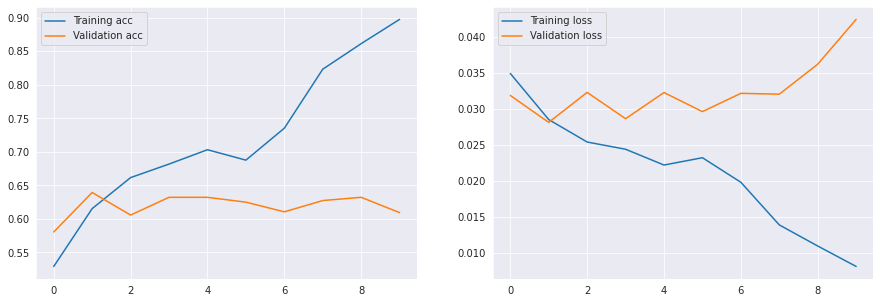

In [ ]:
plot_results(hist1)

In [ ]:
#torch.save(model.state_dict(),'model.pth')

In [ ]:
#model.load_state_dict(torch.load('model.pth'))
#model.eval()

In [ ]:
ans = validateEpoch(model,test_dl,loss_fn)

In [ ]:
ans

(0.036388346842643304, 0.6506602641056423)

In [ ]:
import tqdm
def testing(model,dataloader):
    y_pred_list = []
    y_true_list = []
    with torch.no_grad():
        for x_batch, y_batch in dataloader:
            x_batch, y_batch = x_batch.to(device), y_batch.to(device)
            y_test_pred = model(x_batch)
            _, y_pred_tag = torch.max(y_test_pred, dim = 1)
            y_pred_list.append(y_pred_tag.cpu().numpy())
            y_true_list.append(y_batch.cpu().numpy())
  #print(y_true_list[0])
        y_pred_list = [i[0] for i in y_pred_list]
        y_true_list = [i[0] for i in y_true_list]
    return y_pred_list,y_true_list

In [ ]:
train_preds,train_actual = testing(model,train_dl)
test_preds,test_actual = testing(model,test_dl)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(train_preds,train_actual))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        86
           1       0.81      0.93      0.87        28
           2       0.98      0.98      0.98        42
           3       0.96      1.00      0.98        22
           4       1.00      1.00      1.00         4

    accuracy                           0.95       182
   macro avg       0.95      0.97      0.96       182
weighted avg       0.95      0.95      0.95       182



In [ ]:
print(classification_report(test_preds,test_actual))

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        21
           1       0.33      0.20      0.25        15
           2       0.50      0.70      0.58        10
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         2

    accuracy                           0.60        53
   macro avg       0.65      0.72      0.68        53
weighted avg       0.58      0.60      0.58        53



In [ ]:
torch.save(best_model1,'MobileNetV2.h5')
torch.save(best_model1,'MobileNetV2.pth')
torch.save(best_model1,'MobileNetV2.pkl')
torch.save(best_model1,'MobileNetV2.sav')

Text(0.5, 257.44, 'Predicted label')

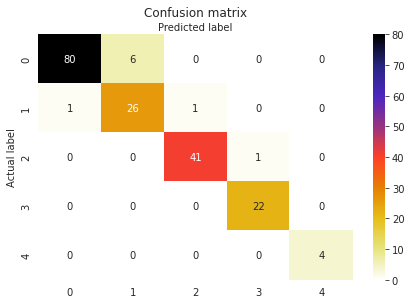

In [ ]:
from sklearn.metrics import confusion_matrix
cfm = confusion_matrix(train_preds,train_actual)
class_names = ['0','1','2','3','4']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cfm),annot=True,cmap='CMRmap_r')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

Text(0.5, 257.44, 'Predicted label')

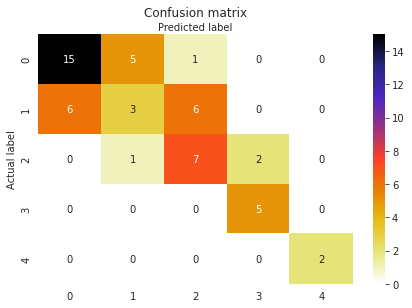

In [ ]:
cfm = confusion_matrix(test_preds,test_actual)
class_names = ['0','1','2','3','4']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cfm),annot=True,cmap='CMRmap_r')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [ ]:
torch.save(model.state_dict(),'MobileNetV2-1.h5')
torch.save(model.state_dict(),'MobileNetV2-1.pth')
torch.save(model.state_dict(),'MobileNetV2-1.pkl')
torch.save(model.state_dict(),'MobileNetV2-1.sav')

## Phase 2

In [ ]:
hist2, best_model2 = train(model,train_dl,val_dl,0.001,optimizer,loss_fn,scheduler,10)

Epoch  0, Train acc=0.922, Val acc=0.605, Train loss=0.007, Val loss=0.045
Epoch  1, Train acc=0.943, Val acc=0.591, Train loss=0.005, Val loss=0.053
Epoch  2, Train acc=0.966, Val acc=0.597, Train loss=0.003, Val loss=0.057
Epoch  3, Train acc=0.966, Val acc=0.594, Train loss=0.003, Val loss=0.061
Epoch  4, Train acc=0.980, Val acc=0.587, Train loss=0.002, Val loss=0.061
Epoch  5, Train acc=0.983, Val acc=0.600, Train loss=0.002, Val loss=0.062
Epoch  6, Train acc=0.985, Val acc=0.572, Train loss=0.002, Val loss=0.064
Epoch  7, Train acc=0.983, Val acc=0.566, Train loss=0.002, Val loss=0.066
Epoch  8, Train acc=0.983, Val acc=0.587, Train loss=0.002, Val loss=0.065
Epoch  9, Train acc=0.984, Val acc=0.582, Train loss=0.002, Val loss=0.066


In [ ]:
train_preds,train_actual = testing(model,train_dl)
test_preds,test_actual = testing(model,test_dl)

In [ ]:
print(classification_report(train_preds,train_actual))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        66
           1       1.00      1.00      1.00        37
           2       1.00      1.00      1.00        50
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00         6

    accuracy                           1.00       182
   macro avg       1.00      1.00      1.00       182
weighted avg       1.00      1.00      1.00       182



In [ ]:
print(classification_report(test_preds,test_actual))

              precision    recall  f1-score   support

           0       0.57      0.71      0.63        17
           1       0.33      0.16      0.21        19
           2       0.43      0.60      0.50        10
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         2

    accuracy                           0.53        53
   macro avg       0.61      0.69      0.64        53
weighted avg       0.49      0.53      0.49        53



Text(0.5, 257.44, 'Predicted label')

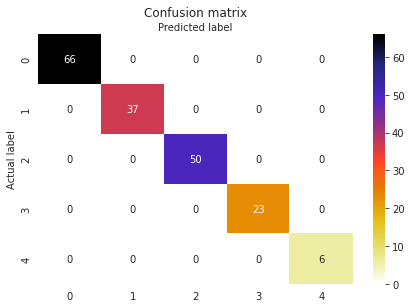

In [ ]:
cfm = confusion_matrix(train_preds,train_actual)
class_names = ['0','1','2','3','4']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cfm),annot=True,cmap='CMRmap_r')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

Text(0.5, 257.44, 'Predicted label')

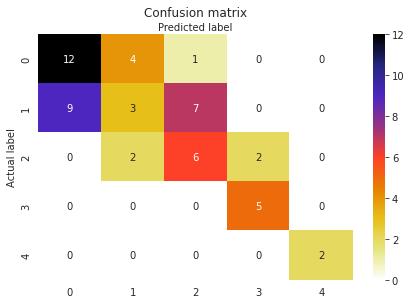

In [ ]:
cfm = confusion_matrix(test_preds,test_actual)
class_names = ['0','1','2','3','4']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)
sns.heatmap(pd.DataFrame(cfm),annot=True,cmap='CMRmap_r')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.Text(0.5,257.44,'Predicted label')

In [ ]:
torch.save(best_model1,'MobileNetV2-2.h5')
torch.save(best_model1,'MobileNetV2-2.pth')
torch.save(best_model1,'MobileNetV2-2.pkl')
torch.save(best_model1,'MobileNetV2-2.sav')

In [ ]:
ans1 = validateEpoch(model,test_dl,loss_fn)

In [ ]:
ans1

(0.056057365573182395, 0.6296518607442977)

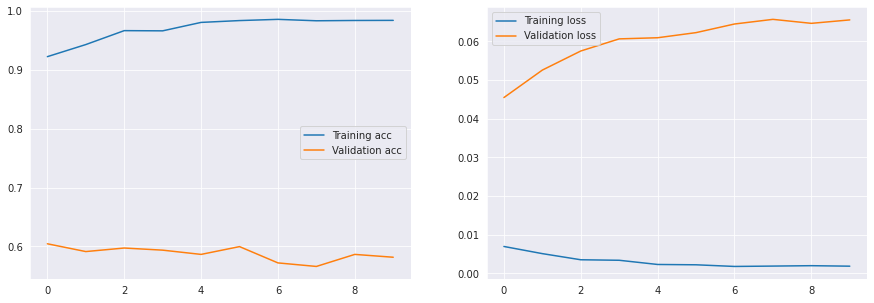

In [ ]:
plot_results(hist2)

In [ ]:
hist = { 'train_loss' : [], 'train_acc': [], 'val_loss': [], 'val_acc': []}
hist['train_loss'].extend(hist1['train_loss'])
hist['train_acc'].extend(hist1['train_acc'])
hist['train_loss'].extend(hist2['train_loss'])
hist['train_acc'].extend(hist2['train_acc'])
hist['val_loss'].extend(hist1['val_loss'])
hist['val_acc'].extend(hist1['val_acc'])
hist['val_loss'].extend(hist2['val_loss'])
hist['val_acc'].extend(hist2['val_acc'])

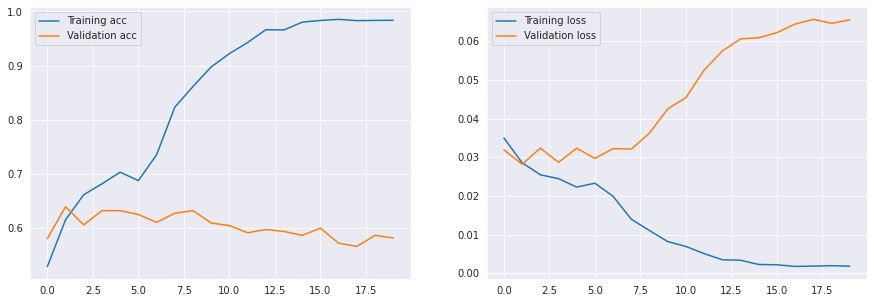

In [ ]:
plot_results(hist)